In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
@staticmethod
def factor(df):
    '''衡量当前波动率高低的过滤器'''
    log_ratio = np.log(df['close'] / df['close'].shift(1))
    hv = log_ratio.rolling(20).std()
    return hv

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.016535
   Rank_IC (Spearman): 0.028439
📊 信息比率:
   IR: 0.340428
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 132186
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------


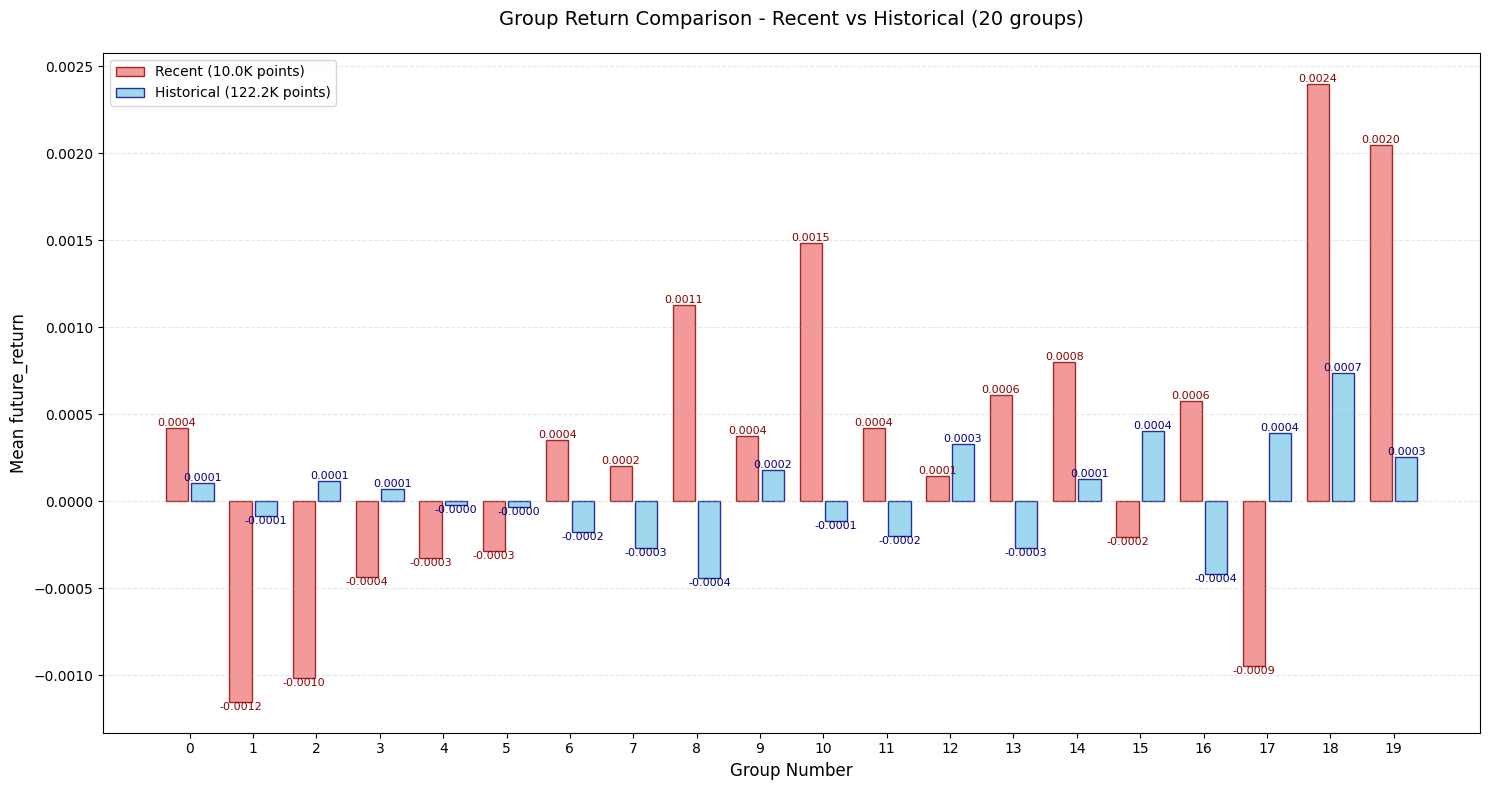

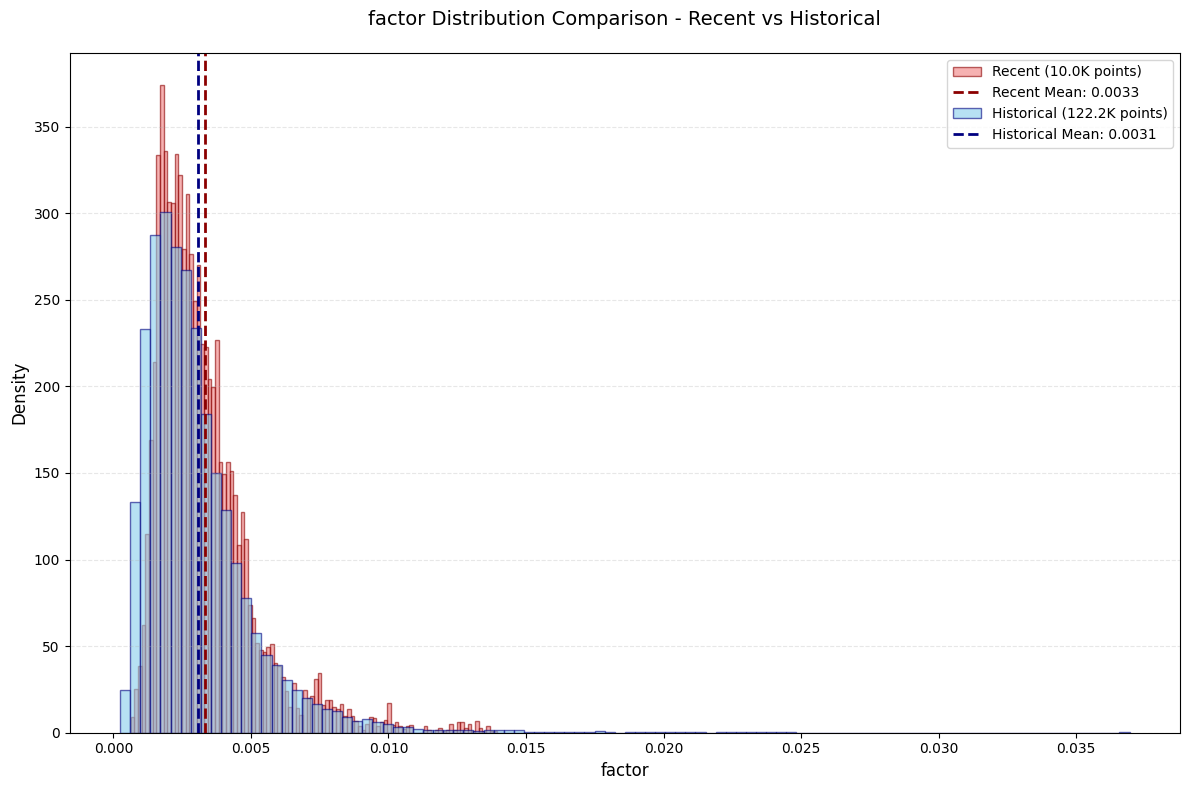

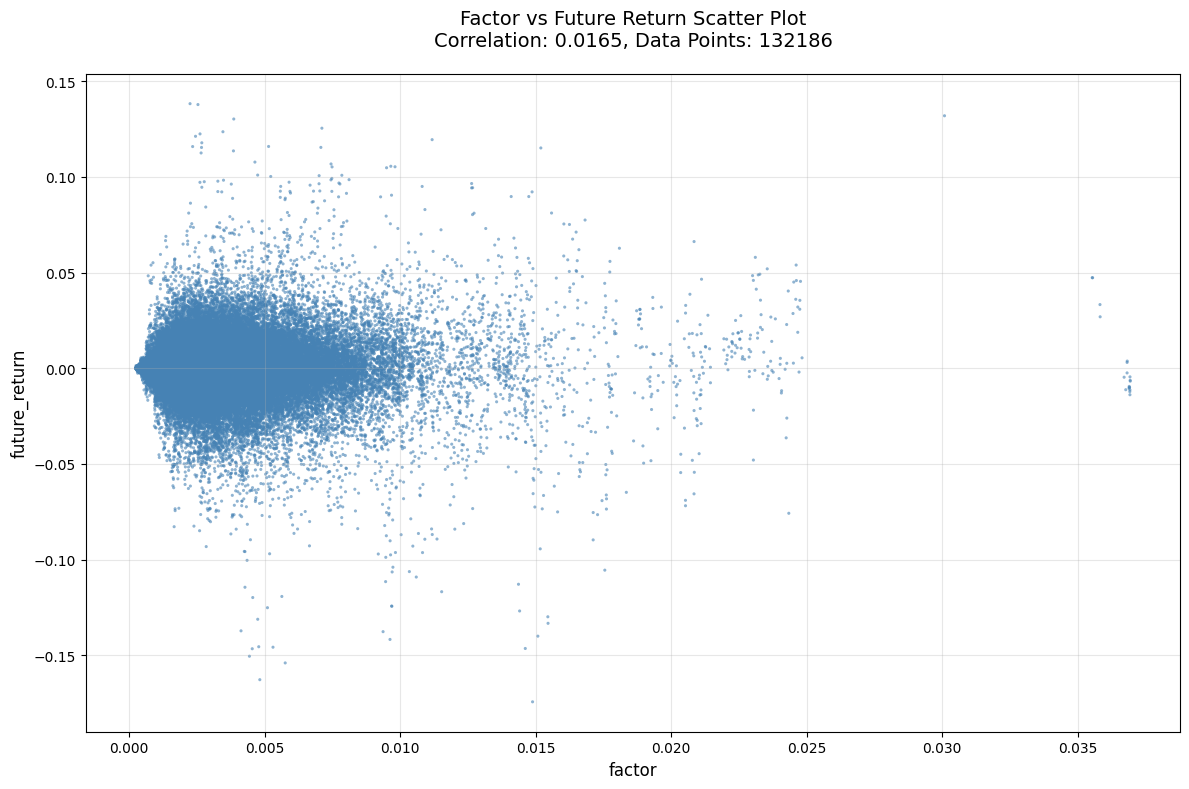

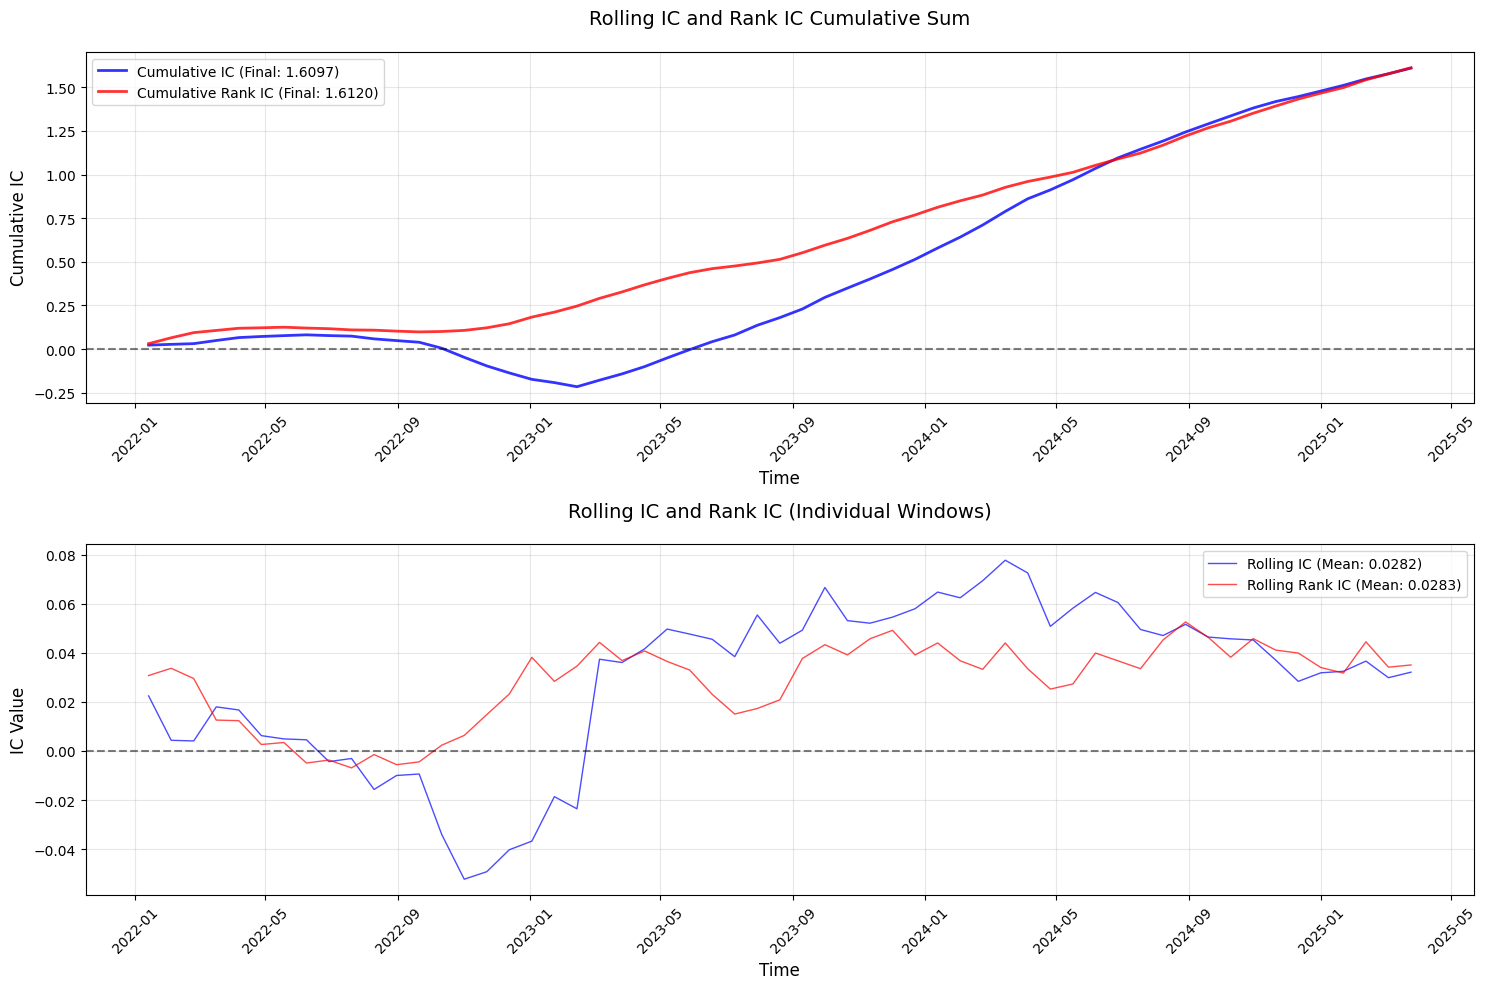

✅ 已显示 4 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

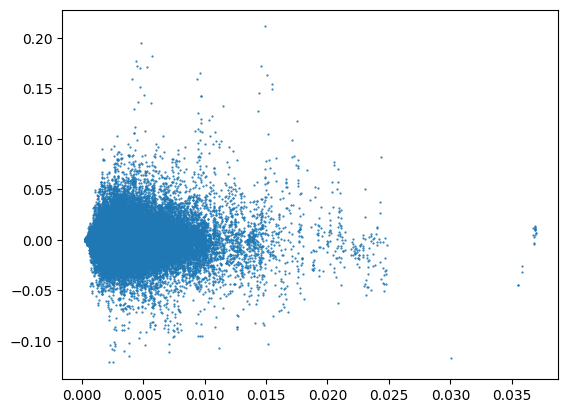

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.005642770982952945,
 -0.0009637372327252144,
 -0.012763650487916096,
 -0.007272366194177956,
 0.03237858411607655,
 0.0017560147066330823,
 -0.010353223882217115,
 -0.0009211921573852244,
 0.037659321622530516,
 0.009957636463365668]

In [8]:
print(result)

{'correlation_analysis': {'IC': 0.01653542858896272, 'Rank_IC': 0.028438713158394226}, 'information_ratio': {'IR': 0.34042839023090016, 'group_correlations': [0.005642770982952945, -0.0009637372327252144, -0.012763650487916096, -0.007272366194177956, 0.03237858411607655, 0.0017560147066330823, -0.010353223882217115, -0.0009211921573852244, 0.037659321622530516, 0.009957636463365668], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0002   0.0010    0.0008       0.0001      0.0039   6610
1       0.0010   0.0012    0.0011      -0.0000      0.0056   6609
2       0.0012   0.0014    0.0013       0.0001      0.0066   6609
3       0.0014   0.0016    0.0015       0.0000      0.0071   6610
4       0.0016   0.0017    0.0017      -0.0001      0.0085   6609
5       0.0017   0.0019    0.0018      -0.0003      0.0084   6609
6       0.0019   0.0021    0.0020 